# Geographic Gaps in CS Subfields

https://docs.google.com/document/d/1rjYFFJPjAgsiXR5c7fSpO4aEztlHhYbhAlcKaAC7hzI/edit

Question(s) to answer in this notebook:
## 1. How do countries cite each other?
## 2. How does geographic location drive the collaboration between researchers? How has this changed over time?

None of the questions in the paper address the size of a country's population, or the number of institutions/universities a country has. More the population or universities, more papers, more citations. We can control for this aspect.

Data:
- [Download](https://zenodo.org/record/6511057#.Y40_-dLMJkj)
- [Schema](https://learn.microsoft.com/en-us/academic-services/graph/reference-data-schema)

# Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import reverse_geocode
import pycountry

from IPython.display import display, clear_output

dataset_dir = "mag_dataset"

# Get Conferences

In [3]:
nlp_conf = ["ACL", "EMNLP", "NAACL", "EACL", "COLING", 
            "WMT", "AACL", "LREC", "TACL", "CL", "LREC", 
            "CONLL", "IJCNLP", "Findings", "RANLP", "SEMEVAL"]

In [4]:
ai_conf = ["AAAI","IJCAI","CVPR","ECCV","ICCV",
           "ICLR","ICML","NeurIPS","NIPS","KDD",
           "ACL","EMNLP","NAACL","SIGIR","WWW"]

In [4]:
conf_series = pd.read_csv(dataset_dir+"/ConferenceSeries.txt", delimiter='\t',
                          usecols = [0, 1, 2, 3, 4, 6], 
                          names = ["ConferenceSeriesId", "Rank", "NormalizedName", "DisplayName", "PaperCount", "CitationCount"])
conf_series

,ConferenceSeriesId,Rank,NormalizedName,DisplayName,PaperCount,CitationCount
0,1134804816,12832,ICIDS,International Conference on Interactive Digita...,608,3050
1,1165160117,14781,SWAT4LS,Semantic Web Applications and Tools for Life S...,86,221
2,1192093291,12284,TRIDENTCOM,Testbeds and Research Infrastructures for the ...,571,5228
3,1199066382,9973,BIOINFORMATICS,International Conference on Bioinformatics,13104,18186
4,1201746639,15463,AIS,Autonomous and Intelligent Systems,171,1028
...,...,...,...,...,...,...
4543,2754809603,14479,IPSS,IEEE International Power Sources Symposium,101,188
4544,2756271167,13535,ECMS,European Conference on Modelling and Simulation,285,941
4545,2756896743,17842,CAI,Conference on Algebraic Informatics,124,599
4546,2757378734,15078,UPGRADE-CN,"Use of P2P, GRID and Agents for the Developmen...",40,314


In [10]:
conf_series.sort_values("Rank")

,ConferenceSeriesId,Rank,NormalizedName,DisplayName,PaperCount,CitationCount
3022,1158167855,6901,CVPR,Computer Vision and Pattern Recognition,19656,1794480
2995,1127325140,7394,NeurIPS,Neural Information Processing Systems,12772,901608
1913,1121227772,7402,ICASSP,"International Conference on Acoustics, Speech,...",47081,638525
2737,1163902177,7625,ICRA,International Conference on Robotics and Autom...,33738,924195
4093,1164975091,7690,ICCV,International Conference on Computer Vision,8846,645280
...,...,...,...,...,...,...
1782,2898341897,25000,SUSCOM,International Conference Sustainable Computing...,1,5
1998,2898600480,25000,HiOS,Heuristics Organizations and Society,1,4
2185,2898417517,25000,SDSC,International Conference Smart Data and Smart ...,120,262
3372,2898188945,25000,ICII,International Conference Information Managemen...,1,6


In [15]:
ai_conf_series = conf_series[conf_series["NormalizedName"].isin(ai_conf)]
ai_conf_series.sort_values("Rank")

,ConferenceSeriesId,Rank,NormalizedName,DisplayName,PaperCount,CitationCount
3022,1158167855,6901,CVPR,Computer Vision and Pattern Recognition,19656,1794480
2995,1127325140,7394,NeurIPS,Neural Information Processing Systems,12772,901608
4093,1164975091,7690,ICCV,International Conference on Computer Vision,8846,645280
3078,1180662882,7795,ICML,International Conference on Machine Learning,11323,587084
547,1184914352,7994,AAAI,National Conference on Artificial Intelligence,21510,446128
3549,1124077590,8091,ECCV,European Conference on Computer Vision,6308,460754
4466,1203999783,8175,IJCAI,International Joint Conference on Artificial I...,12294,319150
802,1188739475,8208,ACL,Meeting of the Association for Computational L...,12003,473932
4034,1130985203,8325,KDD,Knowledge Discovery and Data Mining,7044,418355
1957,1192655580,8634,EMNLP,Empirical Methods in Natural Language Processing,6709,315511


In [16]:
ai_conf_series.to_csv("ai_conf_series.csv", index=None)

In [17]:
conf_series[conf_series["NormalizedName"].isin(nlp_conf)]

,ConferenceSeriesId,Rank,NormalizedName,DisplayName,PaperCount,CitationCount
802,1188739475,8208,ACL,Meeting of the Association for Computational L...,12003,473932
1446,1173951661,9070,NAACL,North American Chapter of the Association for ...,5138,199193
1784,1143871959,11909,RANLP,Recent Advances in Natural Language Processing,836,7627
1821,1164963593,9635,LREC,Language Resources and Evaluation,7884,112587
1957,1192655580,8634,EMNLP,Empirical Methods in Natural Language Processing,6709,315511
3268,1126706392,10503,IJCNLP,International Joint Conference on Natural Lang...,1705,45418
3358,1169674987,9252,COLING,International Conference on Computational Ling...,7955,132151
3673,1188587990,10586,EACL,Conference of the European Chapter of the Asso...,1869,37624


# Get papers of conferences

In [4]:
ai_conf_series = pd.read_csv("ai_conf_series.csv")

In [19]:
paper_cols = ['PaperId', 'Rank', 'Doi', 'DocType', 'PaperTitle', 
         'OriginalTitle', 'BookTitle', 'Year', 'Date', 
         'OnlineDate', 'Publisher', 'JournalId', 'ConferenceSeriesId', 
         'ConferenceInstanceId', 'Volume', 'Issue', 'FirstPage', 'LastPage', 
         'ReferenceCount', 'CitationCount', 'EstimatedCitation', 'OriginalVenue', 
         'FamilyId', 'FamilyRank', 'DocSubTypes', 'CreatedDate']
use_paper_cols = ['PaperId', 'DocType', 'PaperTitle', 'Year', 'Date', 
                  'JournalId', 'ConferenceSeriesId', 'ReferenceCount', 
                  'CitationCount', 'FamilyId']

total_papers = 0
primary_papers = 0

ai_papers = pd.DataFrame([], columns = use_paper_cols)

chunksize = 10 ** 4

with pd.read_csv(dataset_dir+"/Papers.txt", chunksize=chunksize, 
                 delimiter='\t', names=paper_cols,
                 on_bad_lines='warn',
                 usecols = use_paper_cols) as reader:
    for chunk in reader:
        
        ## select required papers
        df = chunk[chunk['ConferenceSeriesId'].isin(ai_conf_series["ConferenceSeriesId"])]
        total_papers += len(df)

        ## select "primary" papers only
        df["FamilyId"] = df["FamilyId"].astype('Int64')
        df = df[df["FamilyId"].isnull() | (df["FamilyId"]==df["PaperId"])]
        primary_papers += len(df)

        ai_papers= pd.concat([ai_papers, df])
        
        clear_output()
        
total_papers, primary_papers

(141073, 138686)

In [20]:
ai_papers.to_csv("ai_papers.csv", index=False)

In [21]:
ai_papers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138686 entries, 1249 to 266118522
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PaperId             138686 non-null  object 
 1   DocType             138686 non-null  object 
 2   PaperTitle          138686 non-null  object 
 3   Year                138686 non-null  object 
 4   Date                138686 non-null  object 
 5   JournalId           0 non-null       float64
 6   ConferenceSeriesId  138686 non-null  float64
 7   ReferenceCount      138686 non-null  object 
 8   CitationCount       138686 non-null  object 
 9   FamilyId            34230 non-null   Int64  
dtypes: Int64(1), float64(2), object(7)
memory usage: 11.8+ MB


In [28]:
ai_papers.groupby("ConferenceSeriesId").count().iloc[:,0].to_frame()\
    .join(ai_conf_series[["ConferenceSeriesId", "NormalizedName"]].set_index("ConferenceSeriesId"))\
    .sort_values("PaperId", ascending=False)

,PaperId,NormalizedName
ConferenceSeriesId,,
1.184914e+09,21066,AAAI
1.158168e+09,19317,CVPR
1.127325e+09,12525,NeurIPS
1.204000e+09,11920,IJCAI
1.188739e+09,11893,ACL
1.180663e+09,11104,ICML
1.164975e+09,8623,ICCV
1.135342e+09,7274,WWW
1.130985e+09,6859,KDD


# Get paper location 
- get authors
- get author affiliations
- get location of affiliation

In [38]:
paper_auth_aff_cols = ["PaperId", "AuthorId", "AffiliationId", "AuthorSequenceNumber"]

total_papers_with_auths = 0

paper_auth_aff = pd.DataFrame([], columns = paper_auth_aff_cols)

chunksize = 10 ** 4

with pd.read_csv(dataset_dir+"/PaperAuthorAffiliations.txt", chunksize=chunksize, 
                 delimiter='\t', names=paper_auth_aff_cols,
                 on_bad_lines='warn', usecols=[0, 1, 2, 3]) as reader:
    for chunk in reader:
                
        ## select required papers
        df = chunk[(chunk['PaperId'].isin(ai_papers["PaperId"]))]
        total_papers_with_auths += len(df)

        paper_auth_aff= pd.concat([paper_auth_aff, df])
        
        clear_output()
        
total_papers_with_auths

475808

In [40]:
paper_auth_aff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475808 entries, 1222 to 719464029
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PaperId               475808 non-null  object 
 1   AuthorId              475808 non-null  object 
 2   AffiliationId         410045 non-null  float64
 3   AuthorSequenceNumber  475808 non-null  object 
dtypes: float64(1), object(3)
memory usage: 18.2+ MB


In [39]:
paper_auth_aff.to_csv("paper_auth_aff.csv", index=False)

### Add Country and Region

In [59]:
aff_cols = ['AffiliationId', 'DisplayName', 'Iso3166Code', 'Latitude', 'Longitude']

all_aff = pd.read_csv(dataset_dir+"/Affiliations.txt", delimiter='\t', 
                      names=aff_cols, usecols = [0, 3, 10, 11, 12])

all_aff

,AffiliationId,DisplayName,Iso3166Code,Latitude,Longitude
0,20455151,Air Liquide,GB,52.503593,-1.805160
1,24386293,Hellenic National Meteorological Service,GR,37.976140,23.736400
2,32956416,Catholic University of the West,FR,47.464720,-0.548610
3,35926432,Mackay Medical College,TW,25.254360,121.495087
4,37448385,Chinese People's Public Security University,CN,39.904690,116.407173
...,...,...,...,...,...
27043,3130807960,Diamond Harbour Women's University,IN,22.258074,88.195140
27044,3131031036,Mediterranean School of Business,TN,36.846280,10.268974
27045,3132176766,Torbat Heydarieh University of Medical Sciences,IR,35.282295,59.219544
27046,3132554608,University of the Latin American Educational C...,AR,-32.955547,-60.644134


In [66]:
paper_auth_aff_with_geo = paper_auth_aff.merge(all_aff.set_index('AffiliationId'),
                                               on = 'AffiliationId',
                                               how='inner')\
                        .rename(columns = {col:"Aff_"+col for col in all_aff.columns[1:]})
paper_auth_aff_with_geo

,PaperId,AuthorId,AffiliationId,AuthorSequenceNumber,Aff_DisplayName,Aff_Iso3166Code,Aff_Latitude,Aff_Longitude
0,11895,1971405447,66906201.0,2,University of Yamanashi,JP,35.678330,138.573059
1,11895,2163873308,66906201.0,1,University of Yamanashi,JP,35.678330,138.573059
2,34604352,1184246027,66906201.0,5,University of Yamanashi,JP,35.678330,138.573059
3,1966859547,2133292699,66906201.0,2,University of Yamanashi,JP,35.678330,138.573059
4,1966859547,2166627689,66906201.0,1,University of Yamanashi,JP,35.678330,138.573059
...,...,...,...,...,...,...,...,...
410040,3197525876,3197055085,118839592.0,2,"California State University, Bakersfield",US,35.350560,-119.104172
410041,3197525876,3197608586,118839592.0,3,"California State University, Bakersfield",US,35.350560,-119.104172
410042,3197911353,2038639866,182451676.0,4,Université du Québec à Rimouski,CA,48.452904,-68.512790
410043,3198662297,2156114512,49946491.0,6,Hyundai Motor Company,KR,37.402653,127.112213


In [67]:
paper_auth_aff_with_geo["Aff_Iso3166Code"].nunique()

116

In [71]:
## Top countries
paper_auth_aff_with_geo.groupby("Aff_Iso3166Code").count().iloc[:, 0].to_frame().sort_values("PaperId", ascending=False).head(20)

,PaperId
Aff_Iso3166Code,
US,185928
CN,54427
GB,20273
DE,17747
CA,13283
JP,11273
AU,10885
FR,10041
HK,8077


In [76]:
len(paper_auth_aff_with_geo)

410045

In [75]:
paper_auth_aff_with_geo[paper_auth_aff_with_geo["Aff_Iso3166Code"].isna()]

,PaperId,AuthorId,AffiliationId,AuthorSequenceNumber,Aff_DisplayName,Aff_Iso3166Code,Aff_Latitude,Aff_Longitude
80275,1908377,2654277792,1.279668e+09,2,Artificial Intelligence Center,NaN,NaN,NaN
80276,1908377,3037650758,1.279668e+09,1,Artificial Intelligence Center,NaN,NaN,NaN
80277,4231444,3149667012,1.279668e+09,1,Artificial Intelligence Center,NaN,NaN,NaN
80278,5118086,2502540265,1.279668e+09,1,Artificial Intelligence Center,NaN,NaN,NaN
80279,9672914,2274032576,1.279668e+09,1,Artificial Intelligence Center,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
409818,3134725622,1839882478,4.019345e+07,2,Université de Sétif,NaN,NaN,NaN
409819,3134725622,2969714047,4.019345e+07,1,Université de Sétif,NaN,NaN,NaN
409854,3143290227,3145904159,8.957049e+08,3,"Government First Grade College, Kolar Gold Fields",NaN,NaN,NaN
409855,3144021118,2768717849,1.305326e+09,2,Maharani’s Science College for Women,NaN,NaN,NaN


In [78]:
## 107 Affilications dont have any ISO code, this accounts for 3k authors :(
## so we can grop them I think

paper_auth_aff_with_geo[paper_auth_aff_with_geo["Aff_Iso3166Code"].isna()].Aff_DisplayName.nunique()

107

In [80]:
paper_auth_aff_with_geo = paper_auth_aff_with_geo.dropna()

In [82]:
paper_auth_aff_with_geo["Aff_Iso3166Code"].apply(lambda x: len(x)).max() ## All use ISO Code of 2 Characters

2

In [100]:
## Get country name from ISO code

paper_auth_aff_with_geo["Aff_country"] = \
                    paper_auth_aff_with_geo["Aff_Iso3166Code"]\
                        .apply(lambda iso: pycountry.countries.get(alpha_2=iso).name)\
                        .apply(lambda x: x.split(",")[0]) ## "Korea, Republic of" --> "Korea"

In [102]:
# Not adding regions for now. Will add when required.
paper_auth_aff_with_geo

,PaperId,AuthorId,AffiliationId,AuthorSequenceNumber,Aff_DisplayName,Aff_Iso3166Code,Aff_Latitude,Aff_Longitude,Aff_country
0,11895,1971405447,66906201.0,2,University of Yamanashi,JP,35.678330,138.573059,Japan
1,11895,2163873308,66906201.0,1,University of Yamanashi,JP,35.678330,138.573059,Japan
2,34604352,1184246027,66906201.0,5,University of Yamanashi,JP,35.678330,138.573059,Japan
3,1966859547,2133292699,66906201.0,2,University of Yamanashi,JP,35.678330,138.573059,Japan
4,1966859547,2166627689,66906201.0,1,University of Yamanashi,JP,35.678330,138.573059,Japan
...,...,...,...,...,...,...,...,...,...
410040,3197525876,3197055085,118839592.0,2,"California State University, Bakersfield",US,35.350560,-119.104172,United States
410041,3197525876,3197608586,118839592.0,3,"California State University, Bakersfield",US,35.350560,-119.104172,United States
410042,3197911353,2038639866,182451676.0,4,Université du Québec à Rimouski,CA,48.452904,-68.512790,Canada
410043,3198662297,2156114512,49946491.0,6,Hyundai Motor Company,KR,37.402653,127.112213,Korea


In [103]:
paper_auth_aff_with_geo.to_csv("paper_auth_aff_with_geo.csv", index=False)

In [104]:
paper_auth_aff_with_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406853 entries, 0 to 410044
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PaperId               406853 non-null  object 
 1   AuthorId              406853 non-null  object 
 2   AffiliationId         406853 non-null  float64
 3   AuthorSequenceNumber  406853 non-null  object 
 4   Aff_DisplayName       406853 non-null  object 
 5   Aff_Iso3166Code       406853 non-null  object 
 6   Aff_Latitude          406853 non-null  float64
 7   Aff_Longitude         406853 non-null  float64
 8   Aff_country           406853 non-null  object 
dtypes: float64(3), object(6)
memory usage: 47.2+ MB


# Paper references (citations)

In [36]:
paper_references_cols = ["PaperId", "PaperReferenceId"]

total_paper_refs = 0

paper_refs = pd.DataFrame([], columns = paper_references_cols)

chunksize = 10 ** 6

with pd.read_csv(dataset_dir+"/PaperReferences.txt", chunksize=chunksize, 
                 delimiter='\t', names=paper_references_cols,
                 on_bad_lines='warn') as reader:
    for chunk in reader:
                
        ## select required papers
        df = chunk[(chunk['PaperId'].isin(ai_papers["PaperId"])) &\
                   (chunk['PaperReferenceId'].isin(ai_papers["PaperId"]))]
        total_paper_refs += len(df)

        paper_refs= pd.concat([paper_refs, df])
        
        clear_output()
        
total_paper_refs

892864

In [42]:
paper_refs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892864 entries, 22251 to 1900236432
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   PaperId           892864 non-null  object
 1   PaperReferenceId  892864 non-null  object
dtypes: object(2)
memory usage: 20.4+ MB


In [37]:
paper_refs.to_csv("paper_refs.csv", index=False)

# Q1: How to countries cite each other?

In [125]:
# 11_370_584 without dropping duplicates
# Goes from 11M to 1M after removing duplicates

paper_refs_country = \
paper_refs.merge(paper_auth_aff_with_geo[["PaperId", "Aff_country"]], on="PaperId", how="inner")\
          .rename(columns = {"PaperId":"Paper", "PaperReferenceId": "Ref_Paper", "Aff_country":"Paper_country"})\
          .merge(paper_auth_aff_with_geo[["PaperId", "Aff_country"]], left_on="Ref_Paper", right_on="PaperId", how="inner")\
          .rename(columns = {"Aff_country":"Ref_Paper_country"})\
          .drop(columns = ["PaperId"])\
          .drop_duplicates()

paper_refs_country

,Paper,Ref_Paper,Paper_country,Ref_Paper_country
0,75756,1605775535,Switzerland,United States
2,1123419,1605775535,United States,United States
6,21168118,1605775535,United States,United States
10,24170294,1605775535,United States,United States
12,80303634,1605775535,United States,United States
...,...,...,...,...
11370547,3198363367,2898454860,United States,United Kingdom
11370549,3198652562,3107156787,United States,Germany
11370557,3198652562,3176381742,United States,United States
11370563,3198846358,3034224723,France,Canada


In [126]:
paper_refs_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479552 entries, 0 to 11370572
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Paper              1479552 non-null  object
 1   Ref_Paper          1479552 non-null  object
 2   Paper_country      1479552 non-null  object
 3   Ref_Paper_country  1479552 non-null  object
dtypes: object(4)
memory usage: 56.4+ MB


In [127]:
paper_refs_country.to_csv("paper_refs_country.csv", index=False)

In [5]:
paper_refs_country = pd.read_csv("paper_refs_country.csv")

### Create matrix and plot

In [6]:
# Create nxn matrix of countries

In [7]:
paper_refs_country

,Paper,Ref_Paper,Paper_country,Ref_Paper_country
0,75756,1605775535,Switzerland,United States
1,1123419,1605775535,United States,United States
2,21168118,1605775535,United States,United States
3,24170294,1605775535,United States,United States
4,80303634,1605775535,United States,United States
...,...,...,...,...
1479547,3198363367,2898454860,United States,United Kingdom
1479548,3198652562,3107156787,United States,Germany
1479549,3198652562,3176381742,United States,United States
1479550,3198846358,3034224723,France,Canada


In [27]:
country_grouped = paper_refs_country.groupby(["Paper_country", "Ref_Paper_country"])\
                      .count()\
                      .iloc[:,0].to_frame().rename(columns = {"Paper":"count"})\
                      .reset_index().sort_values("count", ascending=False)

country_grouped

,Paper_country,Ref_Paper_country,count
3380,United States,United States,340029
542,China,United States,110841
3291,United Kingdom,United States,39054
3309,United States,China,38221
480,China,China,37519
...,...,...,...
566,Colombia,New Zealand,1
2157,Nigeria,Belgium,1
2156,New Zealand,Venezuela,1
1143,Hong Kong,Estonia,1


In [29]:
## all coutries

countries_ref = pd.concat([country_grouped["Paper_country"], country_grouped["Ref_Paper_country"]])

num_countries = countries_ref.nunique()
num_countries

100

In [69]:
# Create index for countries

country_index = countries_ref.unique()
country_rev_index = {country:i for i, country in enumerate(countries_ref.unique())}

In [102]:
## create matrix

matrix = np.zeros((num_countries, num_countries))

for (country1, country2), df in paper_refs_country.groupby(["Paper_country", "Ref_Paper_country"]):
    matrix[country_rev_index[country1], country_rev_index[country2]] = len(df)

In [103]:
matrix.max()

340029.0

In [104]:
matrix.reshape(-1)[matrix.reshape(-1) > 100].shape

(612,)

In [105]:
# https://seaborn.pydata.org/tutorial/color_palettes.html
    
cm = sns.light_palette("green", as_cmap=True)

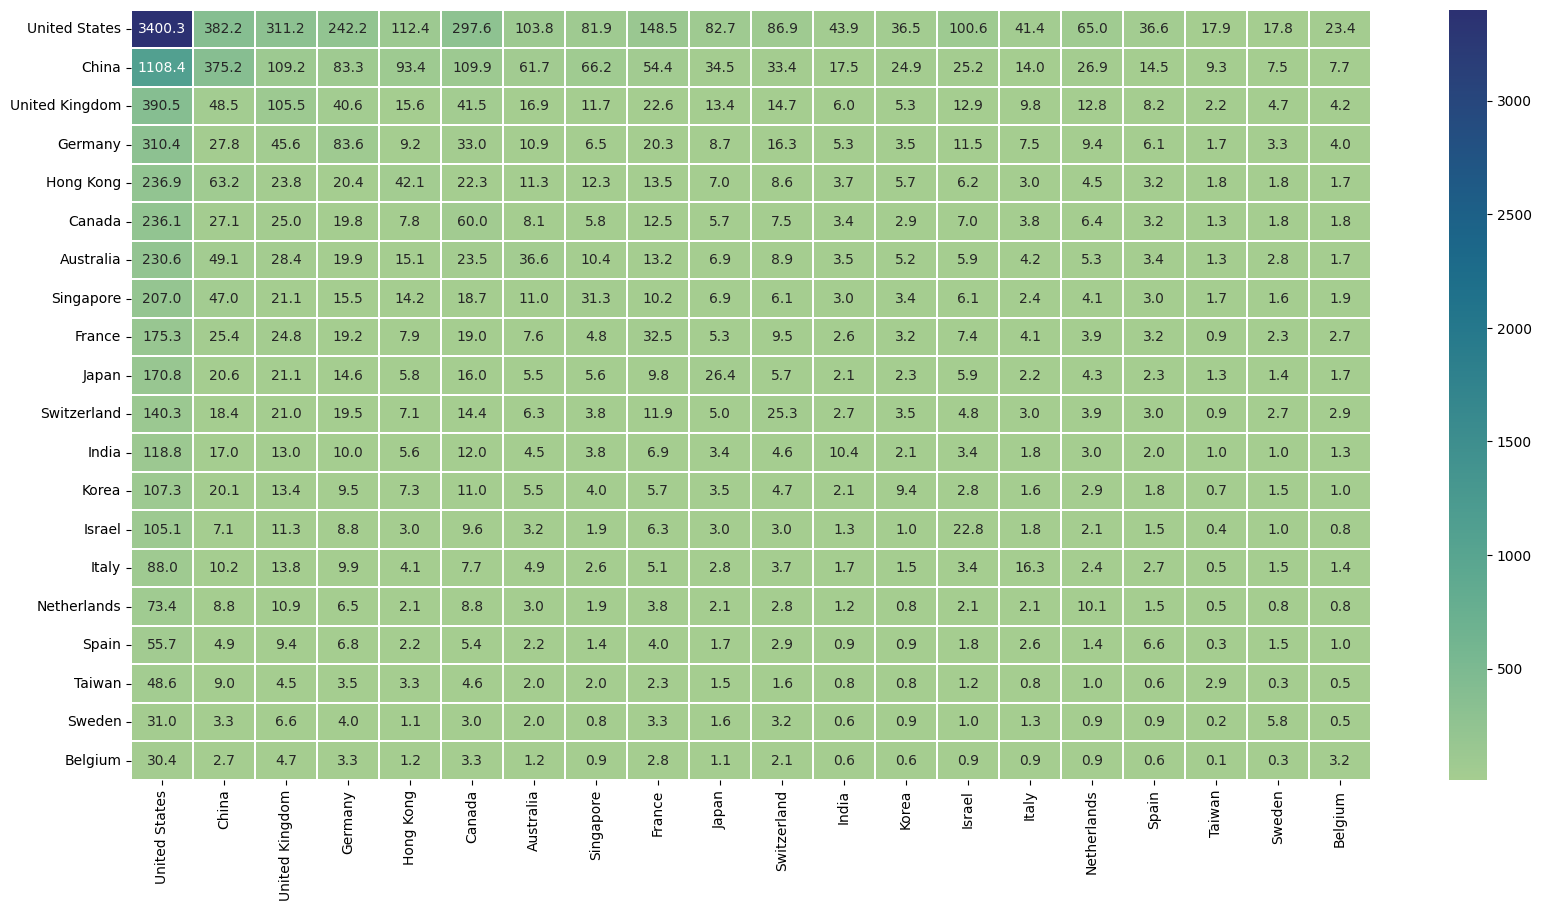

In [124]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

scale = 100
num_countries_to_show = 20
matrix_to_show = matrix[:num_countries_to_show, :num_countries_to_show]
country_names = country_index[:num_countries_to_show]
matrix_to_show = matrix_to_show/scale


sns.heatmap(matrix_to_show, annot=True, cmap="crest", fmt='3.1f', linewidths=.05,
            xticklabels=country_names, yticklabels=country_names, vmin=1000/scale) # vmax=

plt.show()

In [147]:
df = pd.DataFrame(matrix_to_show, columns=country_names, index=country_names)\
    .astype(int)\
    .iloc[::-1,:]

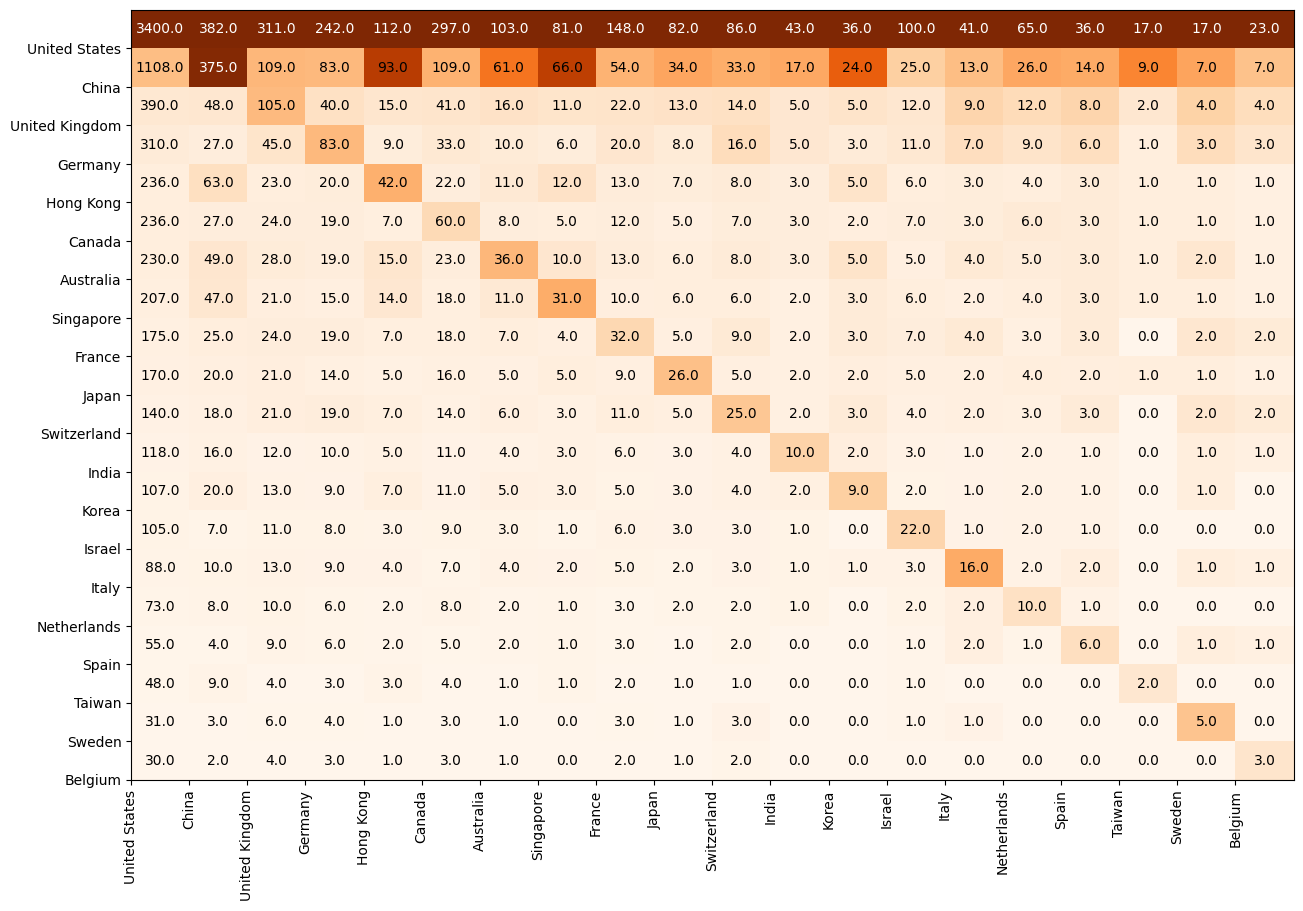

In [189]:
## Who (countries) are most cited in each country
## Column-Wise heatmaps

def columnwise_conditionalformat(df, color = 'Oranges'):
    nrows = len(df)
    ncols = len(df.columns)
    fig, ax = plt.subplots(figsize=(15,10))
    for i in range(ncols):
        truthar = [True]*ncols
        truthar[i] = False
        mask = truthar = np.array(nrows * [truthar], dtype=bool)
        red = np.ma.masked_where(mask, df)
        ax.pcolormesh(red, cmap=color)

    for y in range(df.shape[0]):
        for x in range(df.shape[1]):
            plt.text(x+.5,y+.5,'%3.1f'% df.iloc[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     color="white" if(y==19 or (y==18 and x==1)) else "black" )
    
    plt.xticks(range(num_countries_to_show), country_names, rotation=90)
    plt.yticks(range(num_countries_to_show), country_names[::-1])
    plt.show()
    
columnwise_conditionalformat(df)